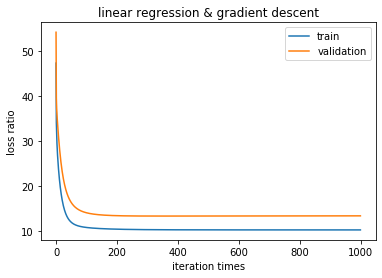

In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import random
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

# 数据读取
data = load_svmlight_file("housing_scale.txt")
# 数据切分
data_train, data_test, value_train, value_test = train_test_split(data[0], data[1], test_size=0.33)

# 初始化
learning_rate = 0.0005
initial_w = random.random(size=(14, 1))
num_iter = 1000

# 偏移值
bias_train = np.mat(np.ones(shape=[data_train.shape[0], 1]))
bias_train = csr_matrix(bias_train).todense()

bias_test = np.mat(np.ones(shape=[data_test.shape[0], 1]))
bias_test = csr_matrix(bias_test).todense()

# 训练集矩阵
x_mat_train = csr_matrix(data_train).todense()
x_mat_train = np.hstack((x_mat_train, bias_train))

y_train = np.mat(value_train).T
y_mat_train = csr_matrix(y_train).todense()

# 验证集矩阵
x_mat_test = csr_matrix(data_test).todense()
x_mat_test = np.hstack((x_mat_test, bias_test))

y_test = np.mat(value_test).T
y_mat_test = csr_matrix(y_test).todense()

# 求梯度
initial_w = csr_matrix(initial_w).todense()
gradient = - np.dot(x_mat_train.T, y_mat_train) + np.dot(np.dot(x_mat_train.T, x_mat_train), initial_w)
d = - gradient
w = initial_w

# 用列表表示每一次迭代的损失率
loss_list_train = []
loss_list_test = []

# 梯度下降
for i in range(num_iter):
    # w，d的迭代更新
    w = w + learning_rate * d
    d = np.dot(x_mat_train.T, y_mat_train) - np.dot(np.dot(x_mat_train.T, x_mat_train), w)
    # d_test = np.dot(x_mat_test.T, y_mat_test) - np.dot(np.dot(x_mat_test.T, x_mat_test), w)

    loss_train = np.dot((y_mat_train - np.dot(x_mat_train, w)).T, (y_mat_train - np.dot(x_mat_train, w))) / 2 / 339
    loss_test = np.dot((y_mat_test - np.dot(x_mat_test, w)).T, (y_mat_test - np.dot(x_mat_test, w))) / 2 / 167

    loss_list_train.append(loss_train.tolist()[0][0])
    loss_list_test.append(loss_test.tolist()[0][0])

# 图像输出
plt.plot(np.arange(0, num_iter), loss_list_train, label=u'train')
plt.plot(np.arange(0, num_iter), loss_list_test, label=u'validation')
plt.legend()
plt.title(u'linear regression & gradient descent')
plt.xlabel(u"iteration times")
plt.ylabel(u"loss ratio")

plt.show()
